Neste noteboook será abordado ...


Importando a base de dados

## 01. Dados com muitas dimensões

In [2]:
import pandas as pd

resultados_exames = pd.read_csv("data/exames.csv")

resultados_exames.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Neste momento deseja-se dividir a base de dados em dois conjuntos: dados de treino e dados de teste. Isto pode ser realizado através do método train_test_split do sklearn.

Como o método train_test_split envolve um fator de aleatoriedade, para fins didáticos utiliza-se um seed fixo para posterior reprodução dos resultados.

In [3]:
from sklearn.model_selection import train_test_split
from numpy import random


SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

X_train, X_test, y_train, y_test = train_test_split(valores_exames, diagnostico)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
X_train.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [5]:
y_train.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

O modelo de machine learning que será utilizado é o Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Ao tentar ajustar o modelo Random Forest para os dados de treino ocorreu um erro devido a presença de valores inválidos na base de dados de treino. Deve-se investigar onde está a origem do erro.

In [7]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [8]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

A partir da investigação dos dados verificou-se que apenas o exame_33 possui dados faltantes. Neste momento, deve-se tomar uma decisão sobre o que fazer com a feature exame_33. Pode-se utilizar algum método de preenchimento dos dados faltantes ou mesmo a remoção da feature da análise. É interessante verificar a porcentagem de dados faltantes para auxiliar a tomada de decisão.

In [9]:
419/569

0.7363796133567663

Os dados referentes ao exame_33 possuem cerca de 74% de dados faltantes. Este número é bastante expressivo e sem melhores informações acerca da natureza dos dados é apropriado que se remova a feature exame_33 da análise.

A seguir:

- remoção da feature exame_33
- configurar o tamanho dos grupos de teste para 30% da base de dados.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random


SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

# valores_exames_v1 : features exclusive exame_33
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

print("Resultado da classificação %.2f%%" %(clf.score(X_test, y_test)*100))

Resultado da classificação 92.40%


O valor 92.40% serve como baseline de acurácia da classificação?

Por que queremos um baseline?

Após as aplicações de técnicas de redução de dimensionalidade é desejável que se tenha um valor para que uma comparação possa ser realizada para atestar a eficiência da redução de dimensionalidade. Alguma métrica deve assumir o papel deste valor de comparação (baseline). Pode-se, por exemplo, utilizar a acurácia como baseline.

- Comparação entre o score do Random Forest e a de um Dummy Classifier (most frequent)

In [11]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

print("Resultado da classificação dummy: %.2f%%" %(dummy_clf.score(X_test, y_test)*100))

Resultado da classificação dummy: 66.67%


## 02. Avançando e explorando dados

In [12]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [13]:
dados_plot.shape

(569, 33)

In [14]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head(20)

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29
5,M,exame_1,12.45
6,M,exame_1,18.25
7,M,exame_1,13.71
8,M,exame_1,13.00
9,M,exame_1,12.46


In [15]:
dados_plot.shape

(18208, 3)

In [16]:
569 * (33 - 1)

18208

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

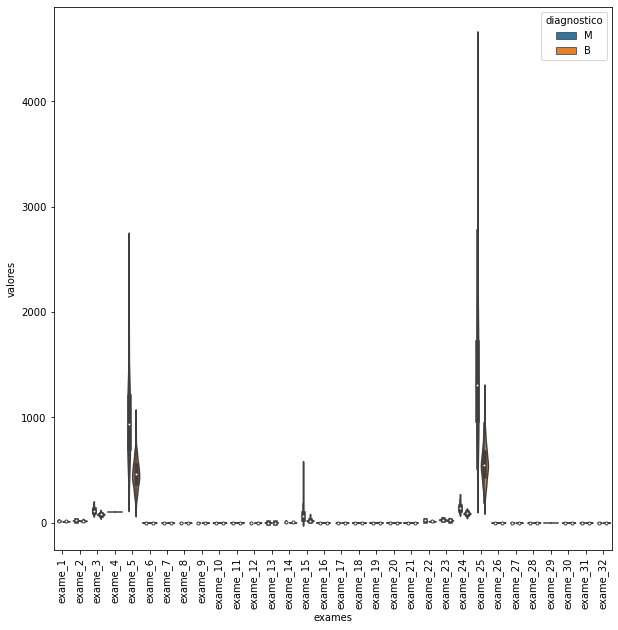

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="valores",hue="diagnostico", data=dados_plot)
plt.xticks(rotation=90)

Como o gráfico está com muita informação, inicialmente é feita a restrição dos resultados apenas para os 10 primeiros exames.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

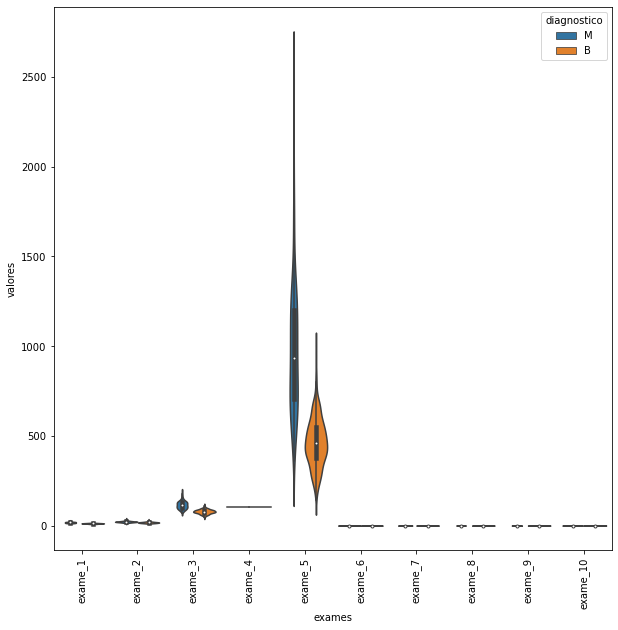

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="valores",hue="diagnostico", data=dados_plot)
plt.xticks(rotation=90)

Pode-se notar que como há uma grande variação dos valores para os diferentes exames. Isto acaba prejudicando a visualização e passa a ser interessante fazer a normalização dos dados.

- A padronização é feita pelo StandardScaler do sklearn.
- O resultado da padronização é um numpy.array e portanto devemos transformá-lo em DataFrame

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

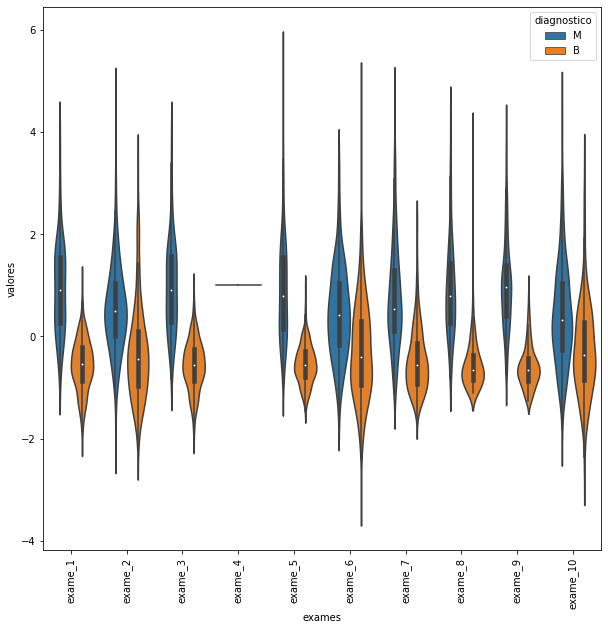

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
valoresExamesPadronizados = padronizador.transform(valores_exames_v1)
valoresExamesPadronizados = pd.DataFrame(data= valoresExamesPadronizados, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valoresExamesPadronizados.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="valores",hue="diagnostico", data=dados_plot)
plt.xticks(rotation=90)

No método plt.violinplot do seaborn pode-se utilizar o parâmetro split=True para uma melhor visualização.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

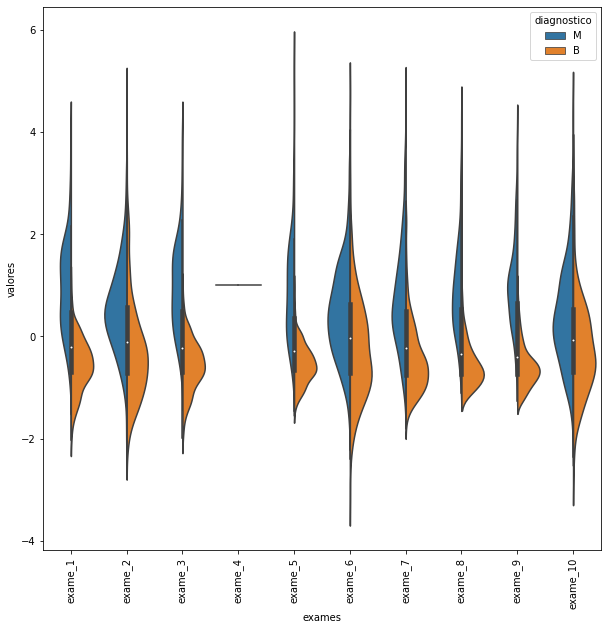

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
valoresExamesPadronizados = padronizador.transform(valores_exames_v1)
valoresExamesPadronizados = pd.DataFrame(data= valoresExamesPadronizados, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valoresExamesPadronizados.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y="valores",hue="diagnostico", data=dados_plot, split=True)
plt.xticks(rotation=90)

E como interpretar este gráfico?

- 

Observa-se que o exame_4 apresenta baixa variação.  

In [21]:
valoresExamesPadronizados['exame_4']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

Agora queremos descobrir qual o comportamento dos dados para os demais exames. Neste momento, torna-se conveniente a criação de uma função para facilitar a reprodução dos resultados para todos os exames. A função para tal está escrita abaixo:

In [22]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio : fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name = "valores")
    
    plt.figure(figsize = (10, 10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split = True)
    plt.xticks(rotation = 90)

Com a utilização da função grafico_violino fica fácil de mostrar os dados para diferentes faixas de exames.

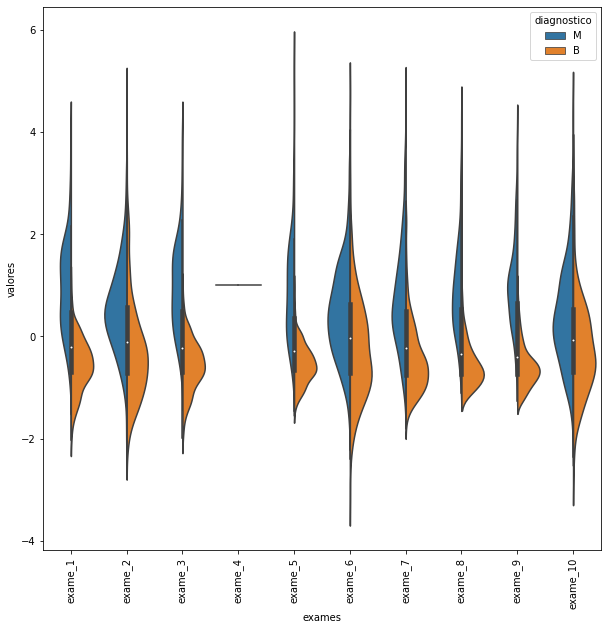

In [23]:
grafico_violino(valoresExamesPadronizados, 0, 10)

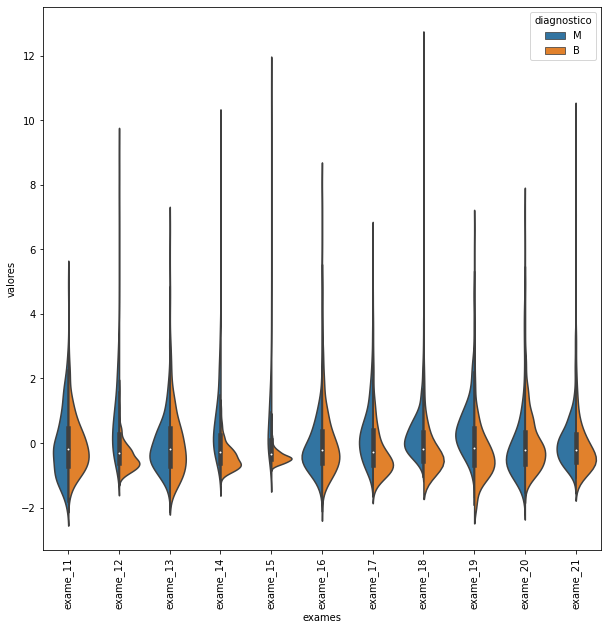

In [24]:
grafico_violino(valoresExamesPadronizados, 10, 21)

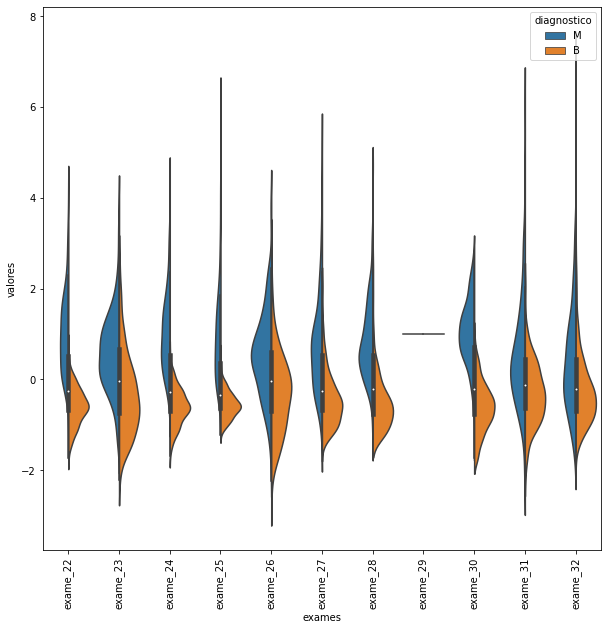

In [25]:
grafico_violino(valoresExamesPadronizados, 21, 32)

Com estes gráficos de violino dos dados de exames podemos tirar algumas conclusões:

- Dados constantes não ajudam na classificação e podem ser descartados.

    Ex: exame_4 e exame_29
    

- Com relação à distribuição dos dados:

    - picos pronunciados na distribuição dos dados ajudam na classificação.

        Ex: exame_15: tem um pico pronunciado para os dados em laranja, indicando uma possível característica para classificação de câncer benigno.


    - dados muito bem distribuídos (flat) não ajudam na classificação

        Ex: dados azuis (Câncer maligno) do exame_5 estão muito bem distribuídos.



- Com relação à comparação das categorias a serem classificadas:

    - dados simétricos não nos ajudam significativamente a classificar o problema;


    - dados assimétricos tendem a serem melhores para a classificação;

        Ex: exame_15, exame_30


In [26]:
# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
# valores_exames_v3 : drop exame_4, exame_29 (dados constantes)

valores_exames_v3 = valoresExamesPadronizados.drop(columns = ["exame_4", "exame_29"])

valores_exames_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)

    X_train, X_test, y_train, y_test = train_test_split(valores, diagnostico, test_size=0.3)

    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(X_train, y_train)

    print("Resultado da classificação %.2f%%" %(clf.score(X_test, y_test)*100))

In [28]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%


Segundo a classificação realizada anteriormente utilizando o Random Forest foi obtido como baseline o valor de acurácia igual a 92.40%. 

Ao investigar melhor a base de dados, foi constatado que alguns exames apresentavam valores constantes. Os exames que apresentaram valores constantes não contribuem para a classificação e portanto podem ser removidos da base de dados.

A classificação que utiliza a nova base de dados com redução de duas dimensões (exame_4 e exame_29) apresentou uma acurácia de 92,98%. Este valor, quando comparado com o baseline (92,80%), revela que não houve decréscimo no valor de acurárica e sim um singelo aumento. Portanto, a técnica de exploração de dados para identificação dos exames que possuem dados constantes e sua posterior remoção foi capaz de reduzir a base de dados em duas dimensões.

## 03. Dados Correlacionados

Uma outra maneira de reduzir a dimensão dos dados consiste na remoção de variáveis que possuem uma alta correlação. Isto ocorre porque se duas variáveis possuem uma alta correlação, então estas apresentam o mesmo comportamento e, portanto, basta apenas a utilização de uma delas durante a análise.


In [29]:
# valores_exames_v3 é um dataframe do pandas.

valores_exames_v3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Para calcular a matriz de correlação de um DataFrame pode-se utilizar o método DataFrame.corr()

In [30]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Este mesmo resultado da matriz de correlação pode ser visualizado de uma forma mais interessante através de um heatmap (neste caso, utilizando a biblioteca seaborn)

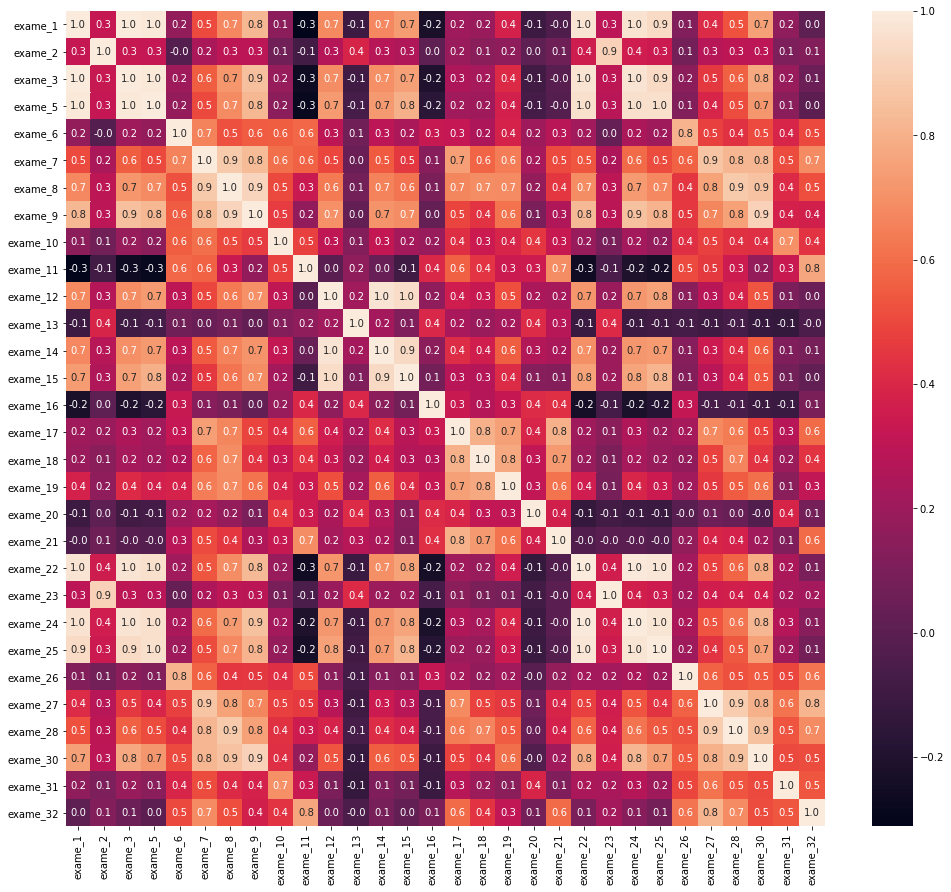

In [31]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")
# annot = True :: mostra o valor da correlação no heatmap
# fmt :: formatação

Análise do heatmap da matriz de correlação.

- observar as correlações 1.0, -1.0 e 0.0

Outra abordagem seria filtrar apenas os resultados com correlação maior que 0.99.

In [32]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ao aplicar o método de soma .sum() sobre a matriz de correlação, pode-se identificar que as variáveis que apresentam alta correlação com outras variáveis são aquelas que apresentam uma soma com valor superior a 1.0 (um valor igual 1.0 significa que a variável apresenta uma alta correlação apenas com ela mesmo).

In [33]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [34]:
variaveis_correlacionadas =  matriz_correlacao_v2[matriz_correlacao_v2 > 1.0]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Ao filtrar os resultados cuja soma das altas correlações é maior que 1.0 foi identificado que existem apenas 4 exames que se enquadram nesta situação.

É interessante observar o que acontece com o valor do score quando estes exames são removidos da base de dados. Para isto é realizado o drop destes exames e executado o modelo sobre esta nova base de dados.

In [35]:
# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
# valores_exames_v3 : drop exame_4, exame_29 (dados constantes)
# valores_exames_v4 : drop exame_1, exame_3, exame_22, exame_24 (exames altamente correlacionados) 

valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [36]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [37]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


Note que o resultado da classificação obtido (91.81%) é menor do que o valor de baseline (92,40%). Isto ocorre pois neste caso removemos todos os exames altamente correlacionados e portanto não foi mantido a característica de nenhum deles. A forma correta de se realizar este drop é através de uma análise mais detalhada de como as variáveis se correlacionam.

Observe novamente as variáveis que apresentam uma alta correlação:

In [38]:

variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Ao observar os valores das somas e a matriz de correlação (através do heatmap) pode-se observar que ocorrem as seguintes relações:
- exame_1 e exame_3 possuem alta correlação
- exame_22 e exame_24 possuem alta correlação

Portanto, basta que apenas um dos exames de cada par faça parte da base de dados.
Por comodidade, neste caso mantêm-se os exames de menor número (exame_1 e exame_22) e é realizado o drop dos exames 3 e 24.

In [39]:
# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
# valores_exames_v3 : drop exame_4, exame_29 (dados constantes)
# valores_exames_v4 : drop exame_1, exame_3, exame_22, exame_24 (exames altamente correlacionados) 
# valores_exames_v5 : drop exame_3, exame_24 (exames altamente correlacionados) 

valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"]) 

In [40]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


Note que o novo score obtido após a classificação, 92.98%, é maior que o baseline (92.40%). Portanto a remoção dos exames que apresentam alta correlação não diminuiram a acurácia do modelo.

## 04. Automatizando a seleção

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(valores_exames_v5, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(X_train, y_train)

ValueError: Input X must be non-negative.

Note que ocorre um erro pois para o ajuste do k-Best utilizando a função chi2 não são permitidos valores negativos. Os valores negativos foram 'introduzidos' durante o processo de normalização. 

In [43]:
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Para contornar este problema é necessário retornar aos dados não normalizados e realizar a remoção das features consideradas dispensáveis. 

In [44]:
features_dispensaveis = ["exame_4", "exame_29", "exame_3", "exame_24"]
valores_exames_v6 = valores_exames_v1.drop(columns=features_dispensaveis)

# valores_examos_v1 : drop exame_33
# valores_exames_v2 : valoresExamesPadronizados
# valores_exames_v3 : drop exame_4, exame_29 (dados constantes)
# valores_exames_v4 : drop exame_1, exame_3, exame_22, exame_24 (exames altamente correlacionados) 
# valores_exames_v5 : drop exame_3, exame_24 (exames altamente correlacionados) 
# valores_exames_v6 : drop exame_4, exame_29, drop exame_3, exame_24 (exames altamente correlacionados) [não normalizado]

In [45]:
SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(X_train, y_train)
kbest_train = selecionar_kmelhores.transform(X_train)
kbest_test =  selecionar_kmelhores.transform(X_test)

In [46]:
kbest_train.shape

(398, 5)

In [47]:
kbest_test.shape

(171, 5)

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=1234)
clf.fit(kbest_train, y_train)
print("Resultado da classificação %.2f%%" %(clf.score(kbest_test, y_test)*100))

Resultado da classificação 92.40%


In [49]:
5/33

0.15151515151515152

Será que olhar somente para a acurácia é válido?


### 04.03 Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, clf.predict(kbest_test))

In [51]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

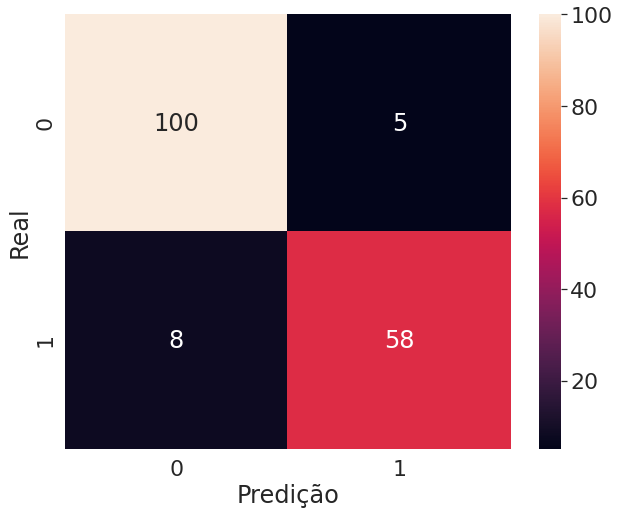

In [53]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")